## $k$-regular random graphs

### (a) Consider the statistical ensemble of random k-regular graphs, i.e. a degree-based ensemble of random microstates where all nodes have exactly degree k. Write down the generating function $G_{0}$ of the degree distribution for a k-regular random graph with given $k \in N$. Use $G_{0}$ to calculate the first and second raw moment of the degree distribution.

In k-regular greph:

$$P(X) = \left\{\begin{array}{lr}1, & X = k \\ 0, & X != k \end{array}\right\}$$

So the generating function:

$$G_{0}(x) = \sum_{k=0}^{\infty} x^{k} P(k) = x^{k}$$

The average degree(1st raw moment):

$$\left< k \right> = \left[ \frac{\partial G_{0}(x)}{\partial x} \right]_{x=1} = k$$

The 2nd raw moment:

$$\left< k^{2} \right> = \left[ \left( x \frac{\partial}{\partial x} \right)^{2} G_{0}(x) \right] = k^{2}$$

### (b) Use the Molloy-Reed criterion to derive the critical point for the parameter k above which we expect a random k-regular network to exhibit a giant connected component in the limit of $n \rightarrow \infty$.

The Molloy-Reed criterion:

$$\frac{\left< k^{2} \right>}{\left< k \right>} > 2$$

So we use results from previous task:

$$\frac{k^{2}}{k} = k > 2$$

So the critical point of emerging the giant connected component in k-regular graph is $k = 2$

### (c) Implement a python function that generates random microstates from the ensemble above for variable parameters k. Confirm your analytical result by calculating the average largest connected component size in microstates generated with different values of k.

In [6]:
import warnings

import numpy as np
import pandas as pd
import pathpy as pp
import seaborn as sns
import matplotlib.pyplot as plt

import random
from tqdm import tqdm
import multiprocessing as mp
from itertools import product
from typing import List, Tuple
from functools import partial, reduce

plt.style.use('default')
sns.set_style("whitegrid")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
def generate_k_regular_network(sample_idx, n, k):
    return pp.algorithms.largest_component_size(pp.generators.Molloy_Reed(np.ones(n) * k))

def find_giant_component_size(n: int, k: int, samples=1):

    func_to_use = partial(generate_k_regular_network, n=n, k=k)

    with mp.Pool(mp.cpu_count()) as pool:
        giant_component_sizes = [i for i in tqdm(pool.imap_unordered(func_to_use, range(samples)), total=samples)]

    return np.mean(giant_component_sizes)

In [14]:
n = 1000
k_values = list(range(20))
components_sizes = [find_giant_component_size(n, every_k, samples=3) for every_k in tqdm(k_values, "Running simulations")]


Running simulations:   0%|          | 0/20 [00:00<?, ?it/s]

	 Generating samples:   0%|          | 0/3 [00:00<?, ?it/s]

	 Generating samples:  33%|███▎      | 1/3 [00:03<00:07,  3.82s/it]

	 Generating samples: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]

Running simulations:   5%|▌         | 1/20 [00:04<01:19,  4.17s/it]

	 Generating samples:   0%|          | 0/3 [00:00<?, ?it/s]

	 Generating samples:  33%|███▎      | 1/3 [00:06<00:12,  6.03s/it]

	 Generating samples:  67%|██████▋   | 2/3 [00:07<00:03,  3.49s/it]

	 Generating samples: 100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Running simulations:  10%|█         | 2/20 [00:12<01:55,  6.41s/it]

	 Generating samples:   0%|          | 0/3 [00:00<?, ?it/s]

	 Generating samples:  33%|███▎      | 1/3 [00:05<00:10,  5.36s/it]

	 Generating samples:  67%|██████▋   | 2/3 [00:05<00:02,  2.40s/it]

	 Generating samples: 100%|██████████| 3/3 [00:05<00:00,  1.97s/it]

Running simulations:  15%|█▌        | 3/20 [00:18<01:45,  6.22s/i

Text(0, 0.5, 'Size of giant component')

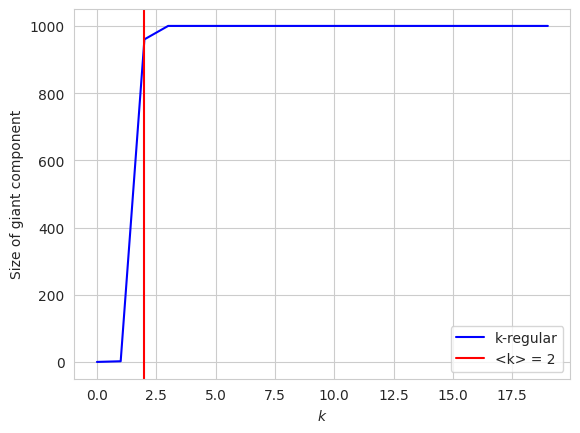

In [17]:
plt.plot(k_values, components_sizes, color="blue", label="k-regular")
plt.axvline(2, color="red", label="<k> = 2")
plt.legend()
plt.xlabel("$k$")
plt.ylabel("Size of giant component")

Considering the graph networks become fully-connected even for $k < 10$. So we will build the graph for $k \in [0, 10]$

Text(0, 0.5, 'Size of giant component')

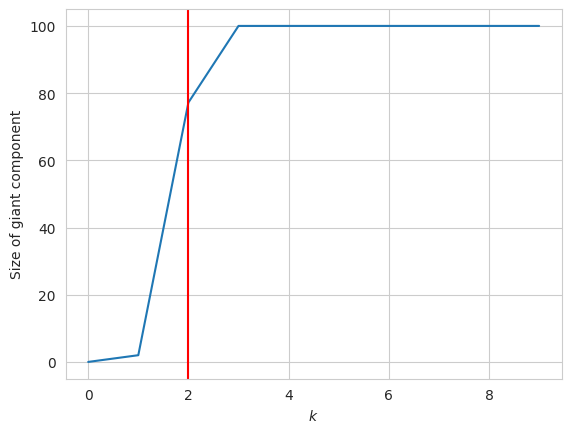

In [9]:
plt.plot(k_values, components_sizes)
plt.axvline(2, color="red")
plt.xlabel("$k$")
plt.ylabel("Size of giant component")

Considering the graph at point $k = 2$ the function change the angle of growing.

### (c) Compare your finding from 1a to the critical threshold for Erdös-Rényi random graphs derived in lecture L08. What does this result tell you about the influence of the heterogeneity of node degrees on connectivity in random networks?

Let`s repeat the experiment from previous task and take the G(n, p) model with same 11 average degrees.

In [29]:
def gen_rand_network(sample_index, n_nodes, p_prob):
    return pp.algorithms.largest_component_size(pp.generators.ER_np(n_nodes, p_prob))


def calc_number_of_giant_connected_components(n_nodes, k_mean_degree, samples=1):
    p_probability = k_mean_degree / n_nodes

    func_to_use = partial(gen_rand_network, n_nodes=n_nodes, p_prob=p_probability)

    with mp.Pool(mp.cpu_count()) as pool:
        giant_component_sizes = [i for i in tqdm(pool.imap_unordered(func_to_use, range(samples)), total=samples)]

    return np.mean(giant_component_sizes)

In [30]:
g_np_components_sizes = [calc_number_of_giant_connected_components(n, every_k, samples=3) for every_k in tqdm(k_values[:11], "Running simulations")]

Running simulations: 100%|██████████| 11/11 [00:46<00:00,  4.25s/it]


Text(0, 0.5, '$Size of giant component$')

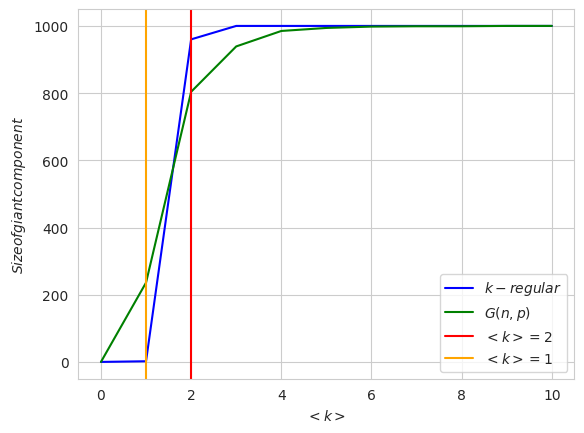

In [33]:
plt.plot(k_values[:11], components_sizes[:11], color="blue", label="$k-regular$")
plt.plot(k_values[:11], g_np_components_sizes, color="green", label="$G(n, p)$")
plt.axvline(2, color="red", label="$<k> = 2$")
plt.axvline(1, color="orange", label="$<k> = 1$")
plt.legend()
plt.xlabel("$<k>$")
plt.ylabel("$Size of giant component$")

Considering the graph the critical point for the heterogeneous network is $\left< k \right> = 1$ while the k-regular network needs at least $\left< k \right> = 2$. But at the same time the k-regular network has bigger giant connected component.

## 2. Epidemics Spreading in Complex Networks

### For the following questions, consider the so-called susceptible-infected-susceptible (SIS) model, a simple model for the spreading of epidemics in social networks. In this model, nodes can either be susceptible (node is in state S) for a disease or a node is currently infected (node is in state I). In each time step t, (i) each susceptible node is infected with probability $\lambda$ if at least one of their neighbors are infected ($S \rightarrow I$), and (ii) infected nodes recover and become susceptible again ($S \rightarrow I$). The only parameter $\lambda$ in this model controls the spreading rate of the disease, i.e. how transmissible it is.

### (a) Implement this model in python and calculate the average fraction of infected nodes in the limit of large times t for Erdös-Renyi Networks with n = 1000 and p = 3/1000 and different values for the disease transmissability λ ∈ (0, 1). You can start the simulation with a small number of 10 nodes that are initially infected at t = 0.

In [52]:
INFECTED = "red"
SUSCEPTIBLE = "blue"
STATE = "color"

In [53]:
def count_infected_nodes(network: pp.Network) -> int:
    return reduce(lambda count, every_node:  count + 1 if every_node[STATE] == INFECTED else count, network.nodes, 0)


def has_infected_neighbour(network: pp.Network, target_node: pp.Node) -> bool:
    infected = list(map(lambda every_neighbour: every_neighbour[STATE] == INFECTED, network.neighbors[target_node.uid]))
    return not all(infected)


def generate_init_network(n_nodes: int, p_prob: float, initial_infected: int = 10):

    def set_state(every_node: pp.Node):
        every_node[STATE] = SUSCEPTIBLE

    network: pp.Network = pp.generators.ER_np(n_nodes, p_prob)
    _ = list(map(set_state, network.nodes))

    currently_infected = 0
    while currently_infected != initial_infected:
        random_node = random.choice(list(network.nodes))
        random_node[STATE] = INFECTED
        currently_infected += 1

    return network


def propagate_one_time_step(network: pp.Network, disease_transmissability: float):

    def infect(node: pp.Node):
        if np.random.uniform(low=0, high=1) < disease_transmissability:
            node[STATE] = INFECTED

    def heal(node: pp.Node):
        node[STATE] = SUSCEPTIBLE

    already_infected: List[pp.Node] = list(filter(lambda every_node: every_node[STATE] == INFECTED, network.nodes))
    possibly_infected = [every_neighbour_node for every_node in already_infected for every_neighbour_node in network.neighbors[every_node.uid]]
    _ = list(map(infect, possibly_infected))
    _ = list(map(heal, already_infected))

    return network


def propagate_one_netw_the_whole_time(network: pp.Network, disease_transmissability: float, time_steps: int):
    infected_nodes_at_start = count_infected_nodes(network)
    infected_nodes = [
        count_infected_nodes(network)
        for _ in range(1, time_steps)
        if (network := propagate_one_time_step(network, disease_transmissability)) is not None
    ]
    return [infected_nodes_at_start] + infected_nodes


def research_values_for_predefined_disease_transmissability(p_prob: float, disease_transmissability: float, n_nodes: int, time_steps: int, samples=1):
    init_networks = [generate_init_network(n_nodes, p_prob) for _ in range(samples)]
    matrix_columns_time_steps_rows_samples = np.matrix([propagate_one_netw_the_whole_time(every_network, disease_transmissability, time_steps) for every_network in init_networks])

    return p_prob, disease_transmissability, np.mean(np.mean(matrix_columns_time_steps_rows_samples, axis=0))

def func_to_use(p_lambda_pair, n_nodes: int, time_steps: int, samples=1):
    return research_values_for_predefined_disease_transmissability(p_lambda_pair[0], p_lambda_pair[1], n_nodes, time_steps, samples)


def run_experiments(n_nodes: int, p_prob_values: List[float], disease_transmissability_values, time_steps: int, samples=1) -> pd.DataFrame:

    pool_func = partial(func_to_use, n_nodes=n_nodes, time_steps=time_steps, samples=samples)

    all_possible_pairs = list(product(p_prob_values, disease_transmissability_values))

    with mp.Pool(mp.cpu_count()) as pool:
        result = [i for i in tqdm(pool.imap_unordered(pool_func, all_possible_pairs), total=len(all_possible_pairs), desc="Run experiments for each disease transmissability value")]

    return pd.DataFrame(result, columns=["p", "lambda", "infected nodes"])

In [54]:
n = 1000
p = 3 / 1000
time_steps = 50
disease_trans_space = np.linspace(0.00000001, 1, 50)

In [55]:
df = run_experiments(n, [p], disease_trans_space, time_steps, samples=3)
df.head()

Run experiments for each disease transmissability value: 100%|██████████| 50/50 [09:56<00:00, 11.93s/it]


,p,lambda,infected nodes
0,0.003,1.000000e-08,0.200000
1,0.003,6.122450e-02,0.280000
2,0.003,4.081634e-02,0.233333
3,0.003,2.040817e-02,0.206667
4,0.003,1.020408e-01,0.260000


[Text(0.5, 0, 'lambda'),
 Text(0, 0.5, 'Infected Nodes'),
 Text(0.5, 1.0, 'Dependence of number of infected nodes on disease transmissivity')]

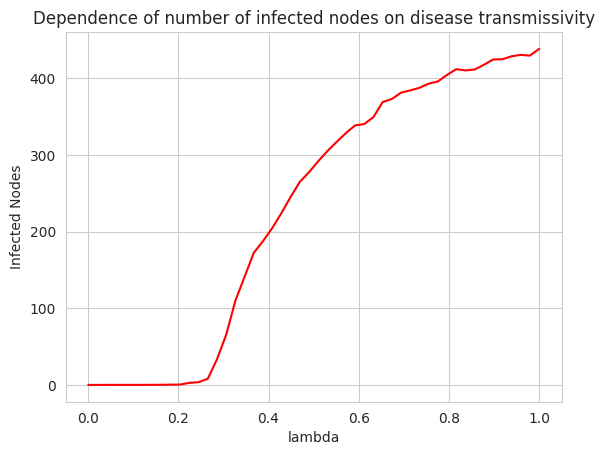

In [64]:
ax = sns.lineplot(data=df, x="lambda", y="infected nodes", color="red")
ax.set(xlabel="lambda", ylabel="Infected Nodes", title="Dependence of number of infected nodes on disease transmissivity")

### (b) Repeat your experiment from 2a for a fixed transmissability $\lambda = \frac{1}{3}$ and different Erös-Rényi random networks with $n = 1000$ and values of $p$ such that $np \in [1, 5]$. How does the average fraction of infected nodes at large times change as we change $p$.

In [57]:
p_values = np.linspace(0.001, 0.005, 50)
disease_trans_probability = 1 / 3

In [58]:
df1 = run_experiments(n, p_values, [disease_trans_probability], time_steps, samples=3)
df1.head()

Run experiments for each disease transmissability value: 100%|██████████| 50/50 [06:24<00:00,  7.69s/it]


,p,lambda,infected nodes
0,0.001245,0.333333,0.433333
1,0.001163,0.333333,0.580000
2,0.001000,0.333333,0.446667
3,0.001082,0.333333,0.406667
4,0.001327,0.333333,0.453333


[Text(0.5, 0, 'p'),
 Text(0, 0.5, 'Infected Nodes'),
 Text(0.5, 1.0, 'Dependence of number of infected nodes on link generation probability')]

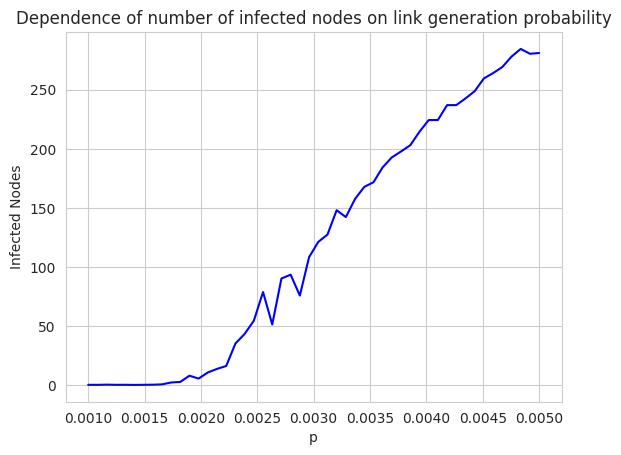

In [65]:
ax = sns.lineplot(data=df1, x="p", y="infected nodes", color="blue")
ax.set(xlabel="p", ylabel="Infected Nodes", title="Dependence of number of infected nodes on link generation probability")

### (c) Can you explain your results from 2a and 2b based on the theoretical results from the lecture? Which possible implications could those results have in light of the current CoViD-19 situation (keeping in mind the severe limitations of the simple model)?
Hint: Consider the following article: M Boguna, R Pastor-Satorras, A Vespignani: Absence of epidemic threshold in scale-free networks with connectivity correlations, Phys. Rev. Lett., 90, 2003

In both tasks we can consider that there is the threshold of epidemics spreading. Probably for decreasing the epidemics spreading we need to limit the number of contacts with people and with vaccination decrease  the number of people that can be infected and it will increase the epidemics spreading threshold.